# Cleaning the dataset

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [94]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [95]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [96]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [97]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [98]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [99]:
df.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

## Grouping by area type

In [100]:
a = df.groupby('area_type').apply(lambda x:x['availability'].count()).reset_index(name='counts')
a

,area_type,counts
0,Built-up Area,2418
1,Carpet Area,87
2,Plot Area,2025
3,Super built-up Area,8790


Text(0.5, 1.0, 'Histogram of Values')

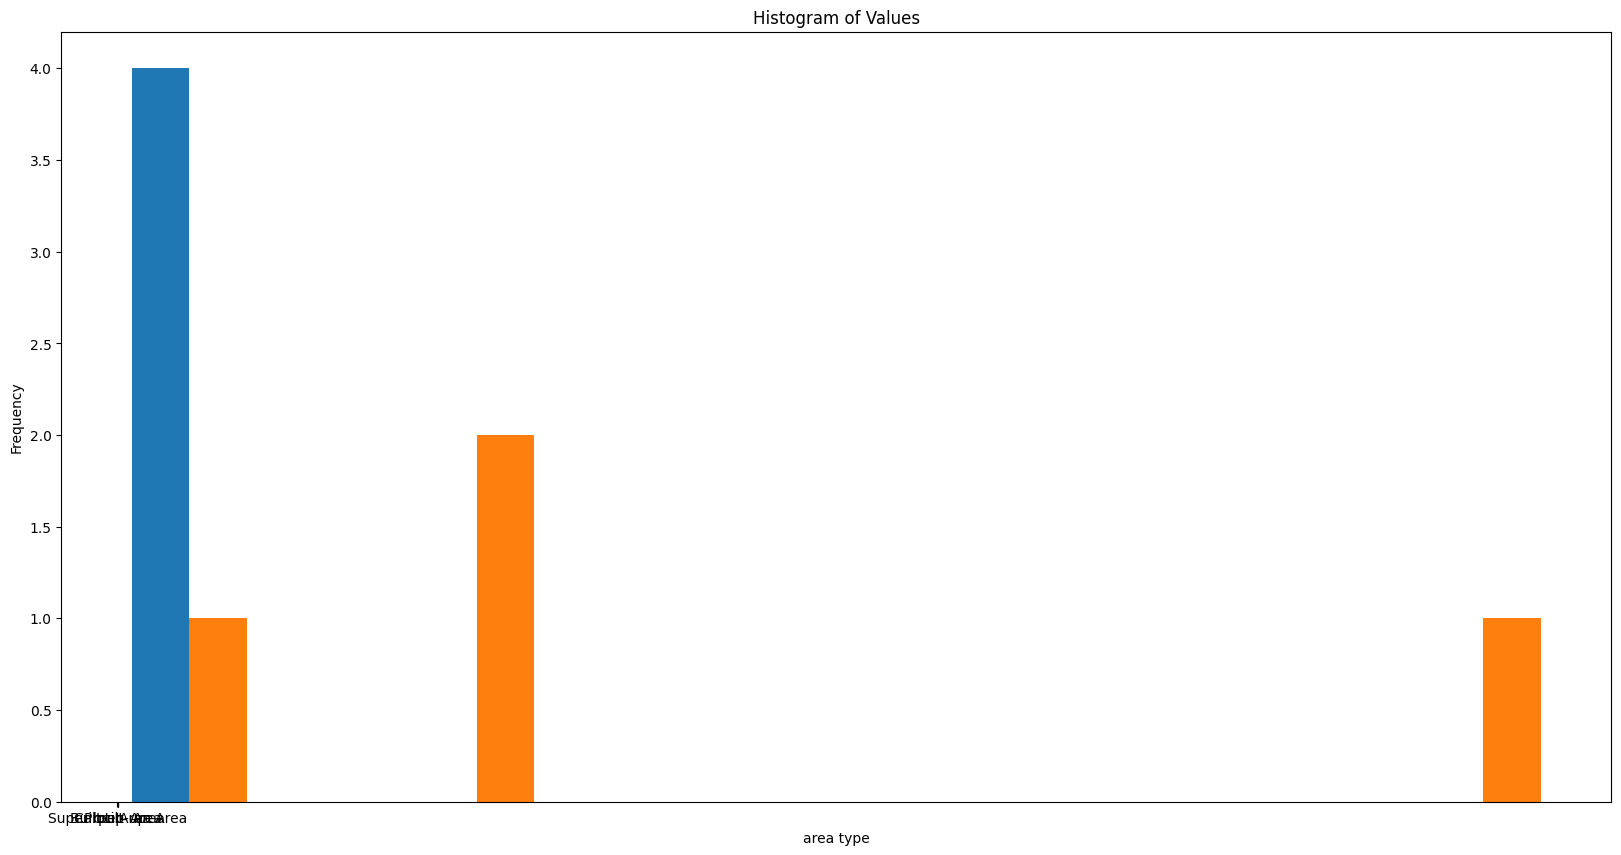

In [101]:
import matplotlib.pyplot as plt

# Assuming 'a' is your array of values
plt.hist(a)
plt.xlabel('area type')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

In [102]:
#drop 'area_type','society','balcony','availability'
df1 = df.drop(['area_type','society','balcony','availability'],axis="columns")
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [103]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [104]:
#droping all na values as numbers are negligible
df1 = df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [105]:
#finding unique values in the column 'size'

df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [106]:
#splitting the values and only taking the first element of the column size

df1['BHK']=df1['size'].apply(lambda x:int(x.split(" ")[0]))
df1 = df1.drop(['size'],axis="columns")

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_12287/2408725617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BHK']=df1['size'].apply(lambda x:int(x.split(" ")[0]))


In [107]:
# number of unique values in column 'location'

df1['location'].nunique()

1304

In [108]:
#total unique values in column 'total_sqft'

df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [109]:
df1['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [110]:
# function that returns float values 

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [111]:
#applying the above function in the column 'total_sqft'

df1[~df1['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [112]:
def avg_sqft(a):
    if isinstance(a,str): 
        b = a.split(' - ')
        if len(b) == 2:
            return (float(b[1])+float(b[0]))/2
        try:
            return float(a)
        except:
            return None
        

In [113]:
#copying df1 to a new column df2

df2 = df1.copy()

In [114]:
#applying the function avg_sqft to column 'total_sqft'

df2['total_sqft']=df2['total_sqft'].apply(avg_sqft)

In [115]:
#finding null values in the column 'total_sqft'

df2.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [116]:
df2

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [117]:
# calculating the price per square feet

df2['Price per square feet'] = (df2['price']*100000)/df2['total_sqft']

df2

,location,total_sqft,bath,price,BHK,Price per square feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [118]:
# checking the number of locations in the dataset

len(df2['location'].unique())

1304

In [119]:
df2['location'] = df2['location'].apply(lambda x: x.strip())
df2.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [120]:
#grouping by location

location_count = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [121]:
#number of locations that have less than equal 10 data points

location_count[location_count<=10].count()

1052

In [122]:
#storing all the location having 10 or less data points in a variable

location_count_10less = location_count[location_count<=10]
location_count_10less

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [123]:
len(df2['location'].unique())

1293

In [124]:
#Locations having less than or euqual 10 will be named as 0

df2['location'] = df2['location'].apply(lambda x: "Other" if x in location_count_10less else x)
df2

,location,total_sqft,bath,price,BHK,Price per square feet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [125]:
#we can see that the unique value of locations have significantly changed 'total location count before' = 1293
#total location count for location having 10 or less datapoints = 1052 (1293-1052=242)

len(df2['location'].unique())

242

Identify the Data anomalies and out liers. In this case we can see that a normal house as a room of about 500 sqft.(in first row 1000/2 = 500) However, in some cases it is not the case. 

In [126]:
# identifiying the columns that have total_sqft/BHK < 500
anomalies = df2[df2['total_sqft']/df2['BHK']<300]
anomalies.head()

,location,total_sqft,bath,price,BHK,Price per square feet
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000


In [127]:
#removing anomalies from the dataset

df3 = df2[~(df2['total_sqft']/df2['BHK']<300)]
df3.shape

(12502, 6)

In [128]:
#identifiying the anomalies from max and min in the price per square feet

df3['Price per square feet'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price per square feet, dtype: float64

In [129]:
#function to remove every thing above and below one standard deviation from the mean in the colum Price per square feet 
# these are extreme values

def remove_anomalies(df):
    removed_anomaly = pd.DataFrame()
    for i, subdf in df.groupby('location'):
        mean = np.mean(subdf['Price per square feet'])
        std = np.std(subdf['Price per square feet'])
        #this line keeps the values from mean - 1 std till mean + 1 std
        anomalies = subdf[(subdf['Price per square feet']>(mean-std)) & (subdf['Price per square feet']<=(mean+std))]
        removed_anomaly = pd.concat([anomalies,removed_anomaly], ignore_index=True)
    return removed_anomaly

df4 = remove_anomalies(df3)
df4.shape

(10241, 6)

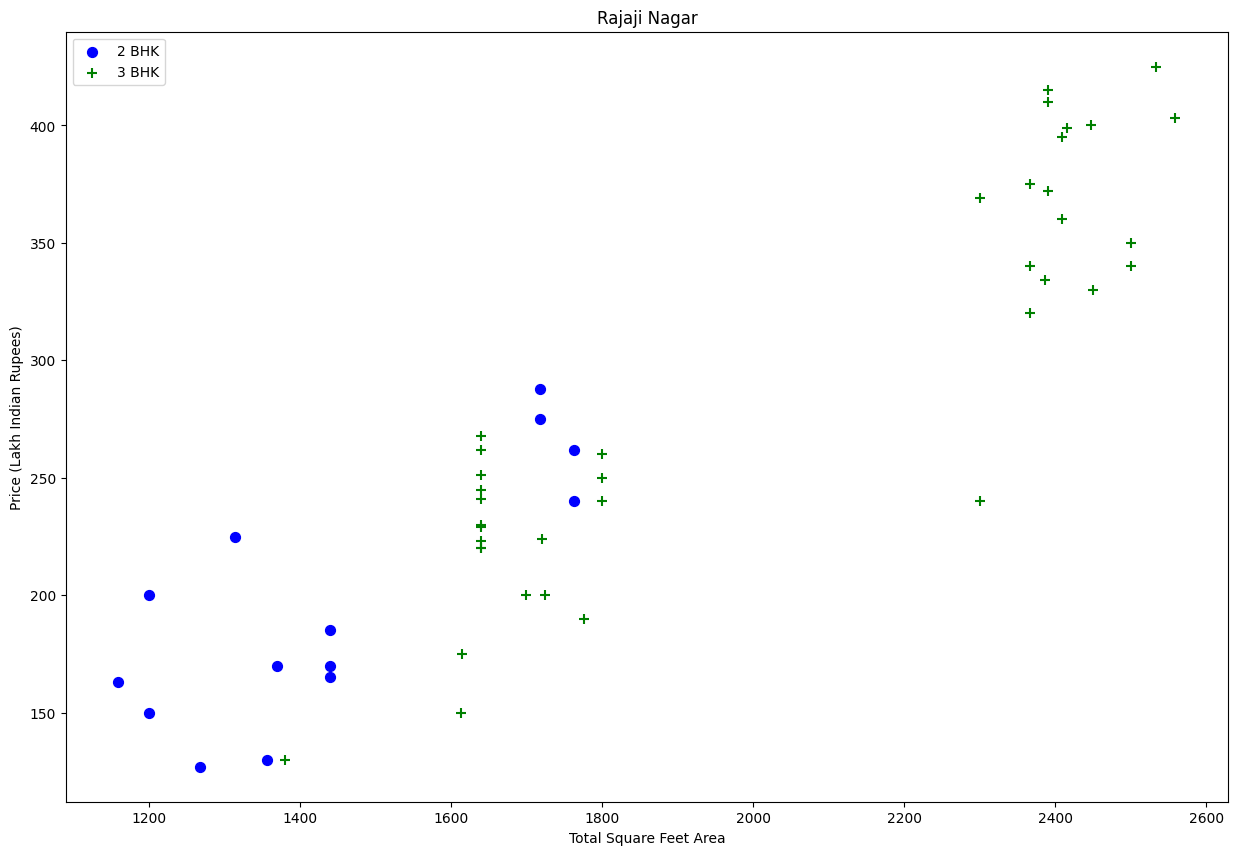

In [130]:
#below in this we can see that price for 2 BHK in some data points are more than 3 bhk and for the same the price is very differen


def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

In [131]:
import pandas as pd

# Group by 'BHK' and calculate mean, max, and standard deviation of 'price'
stats_by_bhk = df4.groupby('BHK')['price'].agg(['mean', 'max', 'std','count'])

print(stats_by_bhk)


           mean     max         std  count
BHK                                       
1     36.527838   306.0   26.852257    518
2     58.666918   288.0   24.662862   4756
3    102.957790   900.0   66.136277   4002
4    227.827221  2100.0  159.275461    745
5    226.625000   720.0  137.279273    108
6    243.790323  1824.0  254.639967     62
7    267.000000  2200.0  474.480769     19
8    196.875000   600.0  122.853232     16
9    220.125000   500.0  118.466918      8
10   378.333333   525.0  192.764969      3
11   255.000000   360.0  148.492424      2
13   275.000000   275.0         NaN      1
16   550.000000   550.0         NaN      1


In [132]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price per square feet']),
                'std': np.std(bhk_df['Price per square feet']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['Price per square feet']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7329, 6)

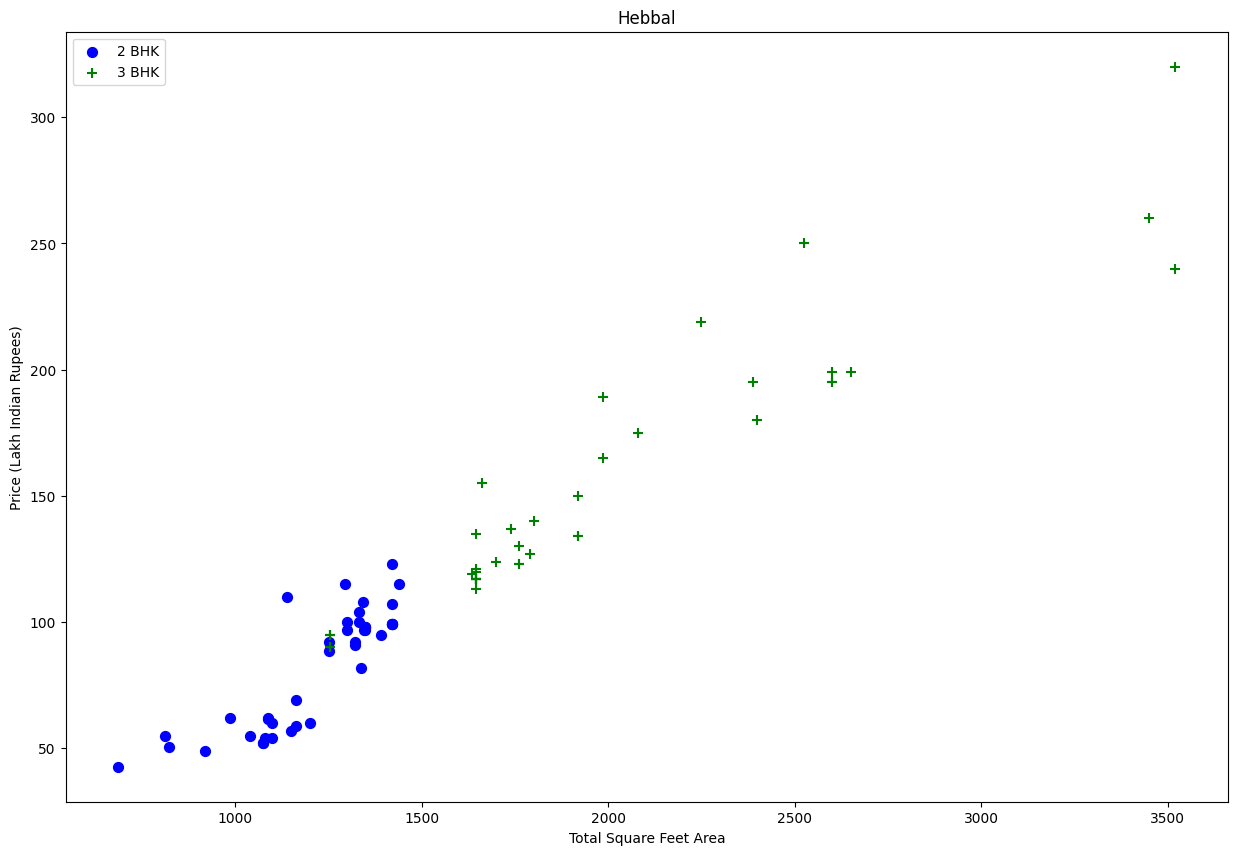

In [133]:
plot_scatter_chart(df5, "Hebbal")


Text(0, 0.5, 'Count')

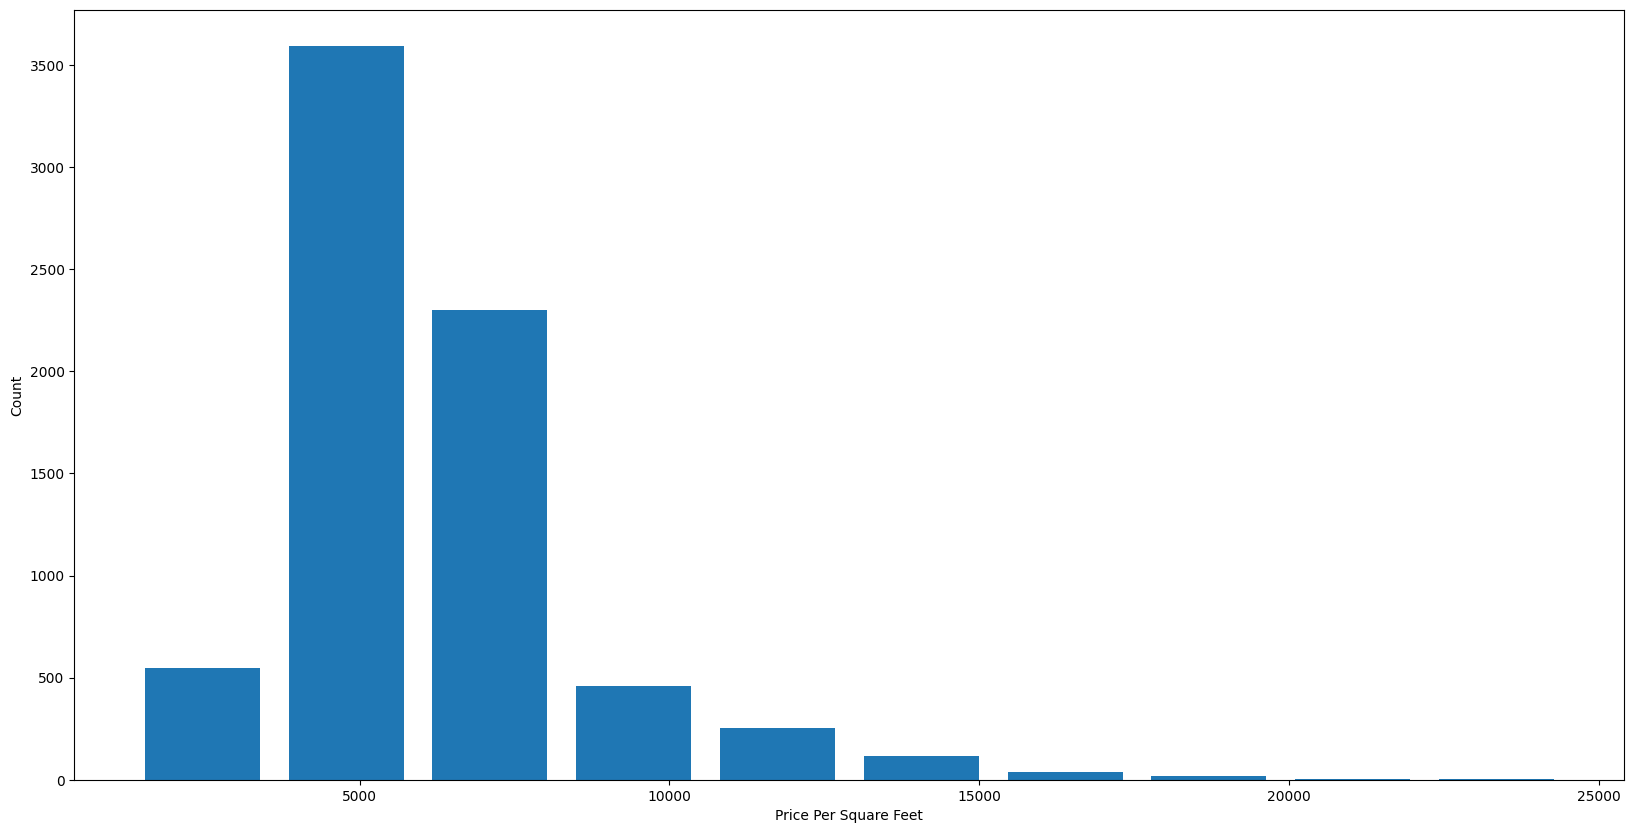

In [134]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5['Price per square feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [135]:
# columns having bathrooms more than bedrooms +2

df5[df5['bath']>(df5['BHK']+2)]

,location,total_sqft,bath,price,BHK,Price per square feet
1361,Thanisandra,1806.0,6.0,116.0,3,6423.034330
3032,Other,11338.0,9.0,1000.0,6,8819.897689
5002,Nagasandra,7000.0,8.0,450.0,4,6428.571429
8612,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520


In [136]:
# new data sets excluding bathrooms less than bedrooms + 2

df6 = df5[df5['bath']<(df5['BHK']+2)]
df6

,location,total_sqft,bath,price,BHK,Price per square feet
1,Yeshwanthpur,1693.0,3.0,108.00,3,6379.208506
2,Yeshwanthpur,667.0,1.0,36.85,1,5524.737631
3,Yeshwanthpur,1950.0,4.0,130.00,4,6666.666667
5,Yeshwanthpur,665.0,1.0,36.85,1,5541.353383
9,Yeshwanthpur,671.0,1.0,36.85,1,5491.803279
...,...,...,...,...,...,...
10236,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
10237,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
10238,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
10239,1st Block Jayanagar,2750.0,4.0,413.00,4,15018.181818


In [137]:
#final clean dataset

df7 = df6.drop('Price per square feet',axis='columns').sort_values(by='location')

df7.reset_index(drop=True, inplace=True)
df7


,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2450.0,4.0,368.0,4
1,1st Block Jayanagar,2850.0,4.0,428.0,4
2,1st Block Jayanagar,1630.0,3.0,194.0,3
3,1st Block Jayanagar,2750.0,4.0,413.0,4
4,1st Block Jayanagar,1200.0,2.0,130.0,3
...,...,...,...,...,...
7246,Yeshwanthpur,666.0,1.0,36.8,1
7247,Yeshwanthpur,1362.0,2.0,100.0,2
7248,Yeshwanthpur,1541.0,2.0,130.0,2
7249,Yeshwanthpur,1855.0,3.0,140.0,3


# Building a model

In [138]:
df7['location'] = df7['location'].astype('category')
dummies = pd.get_dummies(df7.location, dtype=int)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df8 = pd.concat([df7.drop('location', axis = 'columns'),dummies.drop('Other', axis = 'columns')],axis = 'columns')

In [140]:
df8

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,666.0,1.0,36.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7247,1362.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7248,1541.0,2.0,130.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7249,1855.0,3.0,140.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
df8.shape

(7251, 245)

In [142]:
# stating the dependent variable which is all the columns except price

X = df8.drop('price',axis='columns')
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,666.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7247,1362.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7248,1541.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7249,1855.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
y = df8['price']
y

0       368.0
1       428.0
2       194.0
3       413.0
4       130.0
        ...  
7246     36.8
7247    100.0
7248    130.0
7249    140.0
7250    108.0
Name: price, Length: 7251, dtype: float64

In [144]:
X.shape

(7251, 244)

In [145]:
y.shape

(7251,)

In [146]:
#splitting the train and test dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Using linear regression and finding the score

In [150]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)
l_reg.score(X_train,y_train)

0.8421560872370645

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [160]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86677769, 0.79051772, 0.85911682, 0.86993081, 0.7856453 ])

# Find best model using GridSearchCV among Lasso regression and Decision tree

In [161]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  <-- Remove this line
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are defined somewhere in your code
# X: Features, y: Target variable
# Call the function with X and y
find_best_model_using_gridsearchcv(X, y)

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
   

,model,best_score,best_params
0,linear_regression,0.834398,{}
1,lasso,0.711228,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.746509,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## Above in the table we can see that linear regression has the best score among the other two algorithms. Therefore we will be using linear regression

In [169]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,666.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7247,1362.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7248,1541.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7249,1855.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return l_reg.predict([x])[0]

In [174]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.38319299271618